<a href="https://colab.research.google.com/github/Elanchezhiyan01/SCT_DS_02/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape: (32, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB
None
             mpg        cyl        disp          hp       drat         wt  \
count  32.000000  32.000000   32.000000   32.000000  32.000000  32.000000   
mean   20.090625   6.187500  230.721875  146.687500   3.596563   3.217250   
std     6.026948   1.785922  123.938694   68.562868   0.534679   

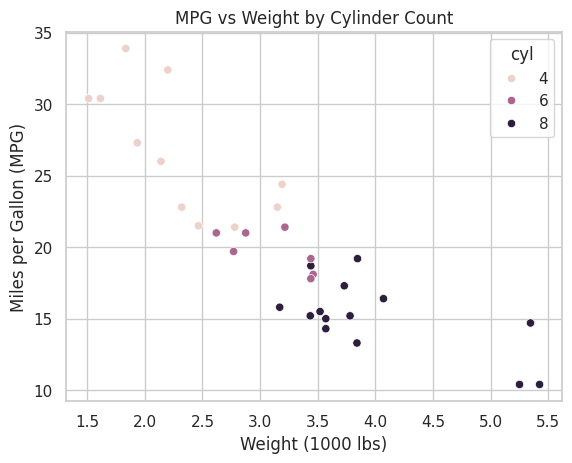

Mean Squared Error (MSE): 5.631293714285674
R² Score: 0.8591616092118302

Sample Predictions:
     Actual MPG  Predicted MPG
29        19.7         19.723
15        10.4         12.908
24        19.2         15.742
17        32.4         27.863
8         22.8         22.440
9         19.2         18.591
30        15.0         14.707


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load Excel dataset
df = pd.read_excel("cars.xlsx")

# Print basic info
print("Shape:", df.shape)
print(df.info())
print(df.describe())

# Basic correlation scatter plot
sns.scatterplot(data=df, x='wt', y='mpg', hue='cyl')
plt.title("MPG vs Weight by Cylinder Count")
plt.xlabel("Weight (1000 lbs)")
plt.ylabel("Miles per Gallon (MPG)")
plt.show()

# Drop 'model' column since it's not numeric
df = df.drop(columns='model')

# Define features and target
X = df.drop('mpg', axis=1)
y = df['mpg']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Show results
results = pd.DataFrame({'Actual MPG': y_test, 'Predicted MPG': y_pred})
print("\nSample Predictions:\n", results.head(10))
